<a href="https://colab.research.google.com/github/Aparna471/my_projects/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170500096/170498071 [==============================] - 6s 0us/step


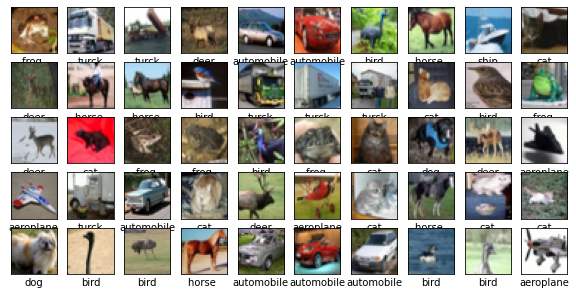

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Out

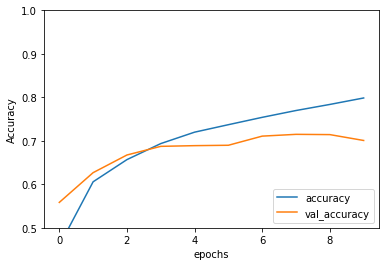

In [1]:
# start 
# impoart libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers , models 
# load dataset 
(train_images ,train_labels) ,(test_images ,test_labels) = datasets . cifar10.load_data()

# Nomalizing pixel values
train_images ,test_images = train_images/255 ,test_images /255
#label
class_names = ["aeroplane" ,"automobile" , "bird" ,"cat" , "deer" , "dog" , "frog " ,"horse ", "ship" ,"turck", "bike","fish"  ]
#Arranging the data set
plt.figure(figsize = (10,10))
for i in  range (50):
  plt.subplot(10 ,10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()
# CNN(Convolution Nueral Network)
model = models.Sequential()
model.add(layers.Conv2D(32 , (3 ,3) , activation= "relu" , input_shape = (32 ,32 , 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64 ,(3,3), activation="relu"))
# Architecture  summary
model.summary()
# Adding dense layer on the top
model.add(layers.Flatten())
model. add(layers.Dense(64 ,activation= "relu"))
model.add(layers.Dense(10))
#Architecture summary()
model.summary()
#compile and train the datasets
model.compile(optimizer ="adam",
              loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics =["accuracy"])
history = model. fit(train_images , train_labels ,epochs= 10,
                     validation_data = (test_images ,test_labels))
#evaluate the data
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label ="val_accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.ylim([0.5 ,1])
plt. legend (loc ="lower right")
test_loss , test_accuracy = model.evaluate(test_images ,test_labels ,verbose=2)
#testing Accuracy 
print(test_accuracy)

#END